In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import zipfile

zip_path = "/content/drive/MyDrive/archive.zip"  # change if in a folder
extract_path = "/content/gtsrb_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to", extract_path)


✅ Dataset extracted to /content/gtsrb_dataset


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2, os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [7]:
data = []
labels = []
classes = 43
img_size = 30

path = extract_path + "/Train"   # archive.zip usually has Train/ and Test/

for i in range(classes):
    folder = os.path.join(path, str(i))
    for img in os.listdir(folder):
        try:
            img_path = os.path.join(folder, img)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (img_size, img_size))
            data.append(image)
            labels.append(i)
        except:
            print("Error loading:", img)

data = np.array(data)
labels = np.array(labels)

# Split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize & one-hot encode
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

print("✅ Data ready. Train shape:", X_train.shape, "Test shape:", X_test.shape)


✅ Data ready. Train shape: (31367, 30, 30, 3) Test shape: (7842, 30, 30, 3)


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2551 - loss: 2.8050 - val_accuracy: 0.8294 - val_loss: 0.7082
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7373 - loss: 0.8472 - val_accuracy: 0.9433 - val_loss: 0.2682
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8424 - loss: 0.4943 - val_accuracy: 0.9674 - val_loss: 0.1594
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8844 - loss: 0.3665 - val_accuracy: 0.9755 - val_loss: 0.1197
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9104 - loss: 0.2813 - val_accuracy: 0.9824 - val_loss: 0.0804
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9276 - loss: 0.2235 - val_accuracy: 0.9834 - val_loss: 0.0689
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9369 - loss: 0.1971 - val_accuracy: 0.9864 - val_loss: 0.0640
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9413 - loss: 0.1755 - val_accuracy: 0

In [10]:
model.save('/content/drive/MyDrive/traffic_control_system_cnn.h5')
print("✅ Model saved to Google Drive!")


✅ Model saved to Google Drive!


In [12]:
classes_names = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles > 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles > 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles > 3.5 metric tons'
}


Saving 00057.png to 00057.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


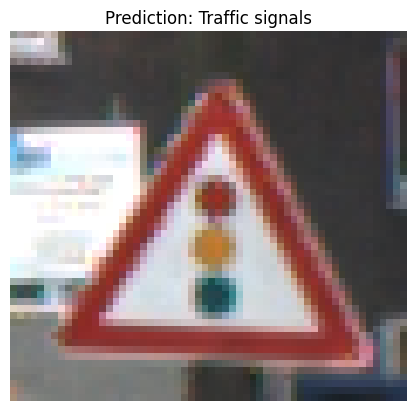

🚦 Predicted Traffic Sign: Traffic signals


In [15]:
from google.colab import files
import matplotlib.pyplot as plt

def predict_traffic_sign(img_path):
    image = cv2.imread(img_path)
    img_resized = cv2.resize(image, (img_size, img_size))
    img_norm = img_resized / 255.0
    img_expanded = np.expand_dims(img_norm, axis=0)

    pred = model.predict(img_expanded)
    class_index = np.argmax(pred)
    sign_name = classes_names[class_index]

    # Show image + prediction
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {sign_name}")
    plt.axis("off")
    plt.show()

    return sign_name

# Upload image and predict
uploaded = files.upload()
for fn in uploaded.keys():
    result = predict_traffic_sign(fn)
    print("🚦 Predicted Traffic Sign:", result)
